Sea el sistema autónomo definido por:  
$$ \dot{q} = f(q,p) $$
$$ \dot{p} = g(q,p) $$
Los puntos del espacio fase donde el flujo es estacionario se denominan puntos fijos tal que: $f(q0, p0) = 0$. Muestre que la estabilidad de los estados mecánicos definidos por esos puntos. Conduce a la siguiente ecuación matricial.  
$$ \frac{\mathrm{d} E}{\mathrm{d} t} = ME , $$
donde M se denomina matriz de estabilidad  
$$ \begin{pmatrix}
\frac{\partial f(q0, p0)}{\partial q} & \frac{\partial f(q0, p0)}{\partial p} \\
\frac{\partial g(q0, p0)}{\partial q} & \frac{\partial g(q0, p0)}{\partial p} 
\end{pmatrix}$$
Los auto-vectores constituyen una base local del espacio de fases. Note que si los valores propios son imaginarios puros, la perturbación permanece acotada oscilando alrededor de los puntos fijos. De lo contrario, si los valores propios son reales, las soluciones crecerán o decrecerán con el tiempo.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import sympy as sym 
from scipy import integrate
from scipy.integrate import odeint

a) Solucione numéricamente el sistema de ecuaciones.  

Expansion de taylor de orden 2:  
$$F(x,y) \approx  F(x+h1,y+h2) + x \frac{\partial f(x+h1, y+h2)}{\partial x} + y \frac{\partial f(x+h1, y+h2)}{\partial y}$$
En la ecuacion diferencial $\dot {q} = f(q,p)$
$$\dot {q} \approx  f(q+h1,p+h2) + h1 \frac{\partial f(q+h1, p+h2)}{\partial q} + h2 \frac{\partial f(q+h1, p+h2)}{\partial p}$$
con condiciones iniciales
En la ecuacion diferencial $\dot {p} = g(q,p)$
$$\dot {p} \approx  g(q+h,p+h) + (q+h) \frac{\partial g(q+h, p+h)}{\partial q} + (p+h) \frac{\partial g(q+h, p+h)}{\partial p}$$
con condiciones iniciales $p_0$:  
$$\dot {p} \approx  g(q_0,p_0) + (q) \frac{\partial g(q+h, p+h)}{\partial q} + (p+h) \frac{\partial g(q+h, p+h)}{\partial p}$$


In [2]:
def System(r,t):
    
    x=r[0]
    y=r[1]
    
  
    dx=2*x - y
    dy=x + 2*y
    
    return [dx,dy]

In [3]:
def IntegratorAdams(f,r0,t):
    
    h = t[1] - t[0]

    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    
    x[0] = r0[0]
    y[0] = r0[1]
    
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    
    present = np.array([x[0],y[0]])
    K11 = f(present,t[0])
    
    # Euler
    x[1] = x[0] + h*K11[0]
    y[1] = y[0] + h*K11[1]
    
    xc = x.copy()
    yc = y.copy()
    
    for i in range(2,len(t)):
        
        present = np.array([x[i-1],y[i-1]])
        past = np.array([x[i-2],y[i-2]])
        
        K11 = f(present,t[i-1])
        K12 = f(past,t[i-2])
        
        x[i] = x[i-1] + 0.5*h*(3*K11[0]-K12[0])
        y[i] = y[i-1] + 0.5*h*(3*K11[1]-K12[1])
        
        xc[i] = x[i]
        yc[i] = y[i]
        
        # Futuro
        futuro = np.array([x[i],y[i]])
        K13 = f(futuro,t[i])
        
        xc[i] = xc[i-1] + h*(5*K13[0]+8*K11[0]-K12[0])/12
        yc[i] = yc[i-1] + h*(5*K13[1]+8*K11[1]-K12[1])/12
    return xc,yc

<IPython.core.display.Javascript object>


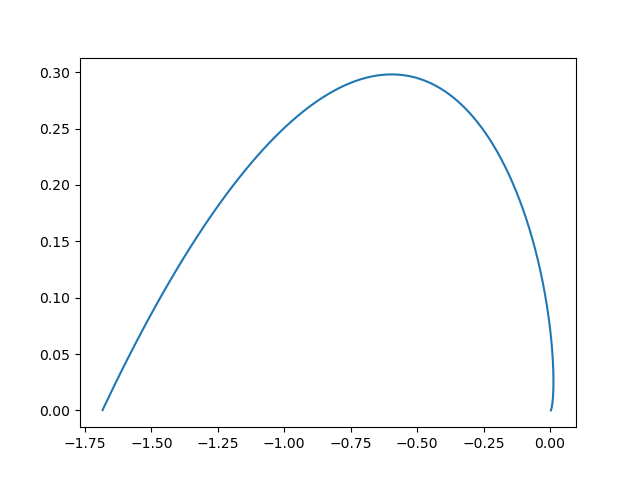

In [7]:
t = np.linspace(0,np.pi,1000)
h = t[1] - t[0]
r0 = [0+h,0]
sol = IntegratorAdams(System,r0,t)
solExact = odeint(System,r0,t)

plt.plot(sol[0],sol[1])

In [6]:
plt.plot(solExact)

b) Encuentre la matriz de estabilidad del sistema autónomo lineal:  
$$ x' = 2x - y$$
$$ y' = x + 2y$$

c) Encuentre numéricamente los valores y vectores propios.

In [8]:
M = np.array([[2,-1],[1,2]])
Values,vectors=np.linalg.eig(M)
print("Valores Propios:", Values)
print("Vectores propios:", vectors[0], " , ",vectors[1])

Valores Propios: [2.+1.j 2.-1.j]
Vectores propios: [0.70710678+0.j 0.70710678-0.j]  ,  [0.-0.70710678j 0.+0.70710678j]


d) Dibuje la trayectoria sobre el espacio fase. ¿Cuál es el punto crítico?

<IPython.core.display.Javascript object>


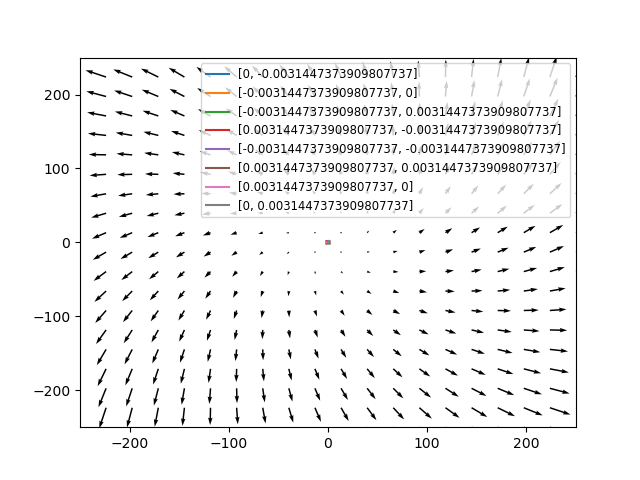

(-250.0, 250.0)

In [10]:
fig=plt.figure()
ax=fig.add_subplot()

r=[[0,0-h],[0-h,0], [0-h,0+h],[0+h,0-h],[0-h,0-h],[0+h,0+h],[0+h,0],[0,0+h]]


for i in r:
    res=IntegratorAdams(System,i,t)
    ax.plot(res[0],res[1], label = str(i))
    plt.legend(fontsize='small')
    


xa,ya = np.meshgrid(np.linspace(-250,250,20),np.linspace(-250,250,20))    
ax.quiver(xa,ya,System([xa,ya],t)[0],System([xa,ya],t)[1])

plt.xlim(-250, 250)
plt.ylim(-250, 250)

Como se puede observar en la gráfica, el punto crítico es (0,0)